<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/Cloud_Cover_Comparison_by_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparing Satellite and Volunteer Cloud Observations

###Eric Schneider, Nicholas Lucas Smith, Ritvik Singh, Van Lin
###Edited by Dr Jones 07-17-2020

#Introduction


Satellites have become a very useful tool in observing the cloud's movement and behavior throughout the entire planet. It should be noted, however, that observations from humans on the planet surface is also very important as well. Why would that be neccessary? Shouldn't the satellites usage be enough due to it being ran by a computer?

This brings up the overall question of this presentation: *How much different is satellite data in comparison to human observations?*

As such, we will collect data from citizens on the ground, and compare it to satellite data. The data is explained in this research journal: https://journals.ametsoc.org/doi/full/10.1175/JAMC-D-18-0297.1 We have access to 3 complete years of observations.

We will make raw comparisons, then later split up the three different cloud heights and work from there. By the end of this presentation, we will see how different the two methods of cloud observation are to eachother, and see if this can change the way people interpret cloud observations.

#Dependencies





In [ ]:
from google.colab import drive #this module allows us to access files on google drive
drive.mount('/content/gdrive') #you will need to authorize access using your google account. Follow the instructions that appear below
import pandas as pd #this allows us to use structures like Dataframes
import matplotlib.pyplot as plt #this is our plotting package
import numpy as np #this allows us to do math with arrays easier

#add additional packages below this comment
import datetime #allows us to display the current date

Mounted at /content/gdrive


#Data


##Read in the database of GLOBE Cloud Observations from 2017-2019
We have acquired these annnual databses from the GLOBE clouds program as CSV files and stored them on the FIRE-CC shared drive in the GLOBE Obs folder. They were then converted to dataframes and stored in pkl files. Then we grabbed the dataframes from those pkl files and combined them into one big dataframe. This data contains satellite information on cloud cover and contains ground observer information on cloud cover at the same time. This allows us to compare how accurate groud observers are compared to the satellite. We are only interested in the cloud cover numbers for all altitudes (Low,Mid,High,Total). We filtered the data so that rows with the total cloud cover being -99.00 were not included since -99.00 was used as a filler for empty spaces.

In [ ]:
globeClouds_2017_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/2017GLOBEclouddata.pkl")
globeClouds_2018_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/2018GLOBEclouddata.pkl")
globeClouds_2019_df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/pkl files/2019GLOBEclouddata.pkl")

globeClouds_combined_df = pd.concat([globeClouds_2017_df, globeClouds_2018_df,globeClouds_2019_df])
globeClouds_combined_df

,Observation Latitude,Observation Longitude,Measurement Date (UTC),Measurement Time (UTC),Total Cloud Cover,High Cloud Cover,Mid Cloud Cover,Low Cloud Cover,GEO Total Cloud Cover,GEO High Cloud Cover,GEO Mid Cloud Cover,GEO Low Cloud Cover
117,47.452650,7.74211,2017-12-21,12:00:00,-99,-99,-99,-99,-99.00,-99.00,-99.00,-99.00
161,24.591479,46.61924,2017-03-09,08:57:00,-99,-99,-99,-99,0.00,0.00,0.00,0.00
183,33.896700,-81.14280,2017-08-21,17:33:00,isolated,-99,few,isolated,27.55,0.00,16.33,11.22
184,33.896700,-81.14290,2017-08-21,18:03:00,none,-99,-99,-99,16.33,0.00,14.29,2.04
185,33.896500,-81.14260,2017-08-21,18:08:00,few,-99,few,few,9.18,2.04,7.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
217232,42.175000,-122.65820,2019-12-31,21:19:00,isolated,few,few,few,45.00,0.00,30.00,15.00
217234,30.746600,-97.78130,2019-12-31,22:08:00,scattered,scattered,few,-99,62.69,35.82,26.87,0.00
217235,19.214100,-155.87700,2019-12-31,22:14:00,scattered,-99,scattered,-99,47.42,0.00,10.31,37.11
217236,41.742800,-111.81130,2019-12-31,22:39:00,obscured,-99,-99,-99,96.05,82.89,13.16,0.00


#Methods






## Objective 1
Our first task was to recreate a boxplot from the paper. There is one box for each category of cloud cover reported by the citizen scientists. The y-axis is the  cloud cover reported by the geostationary satellite at the exact same time as the citizen science observation. The location of the box represents the mean and the location of the aserisks are 1 standard deviation above and below the mean.

Figure 3 from the paper:

>![Figure 3](https://ams.silverchair-cdn.com/ams/content_public/journal/jamc/58/11/10.1175_jamc-d-18-0297.1/1/jamc-d-18-0297_1-f3.png?Expires=1598017591&Signature=xmHVaOqWX30AUT2E5-QMr2PNt6AufVLuySPNH9Sf2LXBP~l3j9EUFWmZft2SpLzc~ONN9F4POs9v7KSIAHBMkGfHQtuusbDzr00lYMncWURvd2akXpaz-HabNdaZTpQ~LckTR4hexT18MDaxXHYG76X45JpTbTds4ZrJSG~7jY763DHh3jNf42KaOGff31JNN3g1Xjd8NlrZEgdZ-VJsNGAD0esYyF1~fjv8rcCZKFvfPm~m6~ZVDS7-4r-ljQGXTjo5~mqsAehRELuo5h2GOkAe1RVjKx8~IjivQ71XUo8ZX1EMUrIPDor-SoDQO4MbYioL3bz-Pd2gT4ydORxrwg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)


### What We Did
We created a method to do the repetitive parts of our code such as the getting of the data. For this we created a method called getData which takes the category and height value. The height value can either be Low,Mid,High, or Total and the category are keywords the dataset uses for each GLOBE CLDC category. For example, for NON the keywords is 'none', for CLR it is 'few', etc.  The method then creates a boolean checking if the total cloud cover reported by the satellite is not -99.00 and if the category matches the category recived. Then the method gets all the rows satisfying this boolean and returns the specified height GEO (Geostationary Satellitle Data)  cloud cover column.

In [ ]:
# Gathering Data

# Created method to get data
def getData(category,height):
  # Created boolean to get data that meets certian conditions (the category and if the data is not -99.00  (-99.00 is used as a filler))              
  useful_data = (globeClouds_combined_df['GEO Total Cloud Cover'] != -99.00) & (globeClouds_combined_df['Total Cloud Cover'] == category)
  # Got rows satisfying the boolean
  data_all = globeClouds_combined_df.loc[useful_data]
  # Got the specified column from the rows above
  return_data = data_all['GEO ' + height + ' Cloud Cover']
  return return_data

This method is used for all categories and using the height as 'Total' since we wanted the Total GEO Cloud Cover

In [ ]:
# Used method on all categories
NON_data_graph = getData('none','Total')
CLR_data_graph = getData('few','Total')
ISO_data_graph = getData('isolated','Total')
SCT_data_graph = getData('scattered','Total')
BKN_data_graph = getData('broken','Total')
OVC_data_graph = getData('overcast','Total')

We then calculate the location of the asterisks by getting the mean and calucluating one standard deviation above and below of the cloud cover for each of the categories.

In [ ]:
# Found locations of asterisks
NON_upper_ast = (NON_data_graph.mean()) + (NON_data_graph.std())
NON_lower_ast = (NON_data_graph.mean()) - (NON_data_graph.std())

CLR_upper_ast = (CLR_data_graph.mean()) + (CLR_data_graph.std())
CLR_lower_ast = (CLR_data_graph.mean()) - (CLR_data_graph.std())

ISO_upper_ast = (ISO_data_graph.mean()) + (ISO_data_graph.std())
ISO_lower_ast = (ISO_data_graph.mean()) - (ISO_data_graph.std())

SCT_upper_ast = (SCT_data_graph.mean()) + (SCT_data_graph.std())
SCT_lower_ast = (SCT_data_graph.mean()) - (SCT_data_graph.std())

BKN_upper_ast = (BKN_data_graph.mean()) + (BKN_data_graph.std())
BKN_lower_ast = (BKN_data_graph.mean()) - (BKN_data_graph.std())

OVC_upper_ast = (OVC_data_graph.mean()) + (OVC_data_graph.std())
OVC_lower_ast = (OVC_data_graph.mean()) - (OVC_data_graph.std())

We then started ploting the data by putting all the data in one list and making a boxplot of it. We created some props for the meanpoint, median, and whiskers which made the meanpoint look more visible and hid the median line and whiskers. We then set the title, y-axis label, x-axis label and the ticks for each axis. And finally drew the asterisks using the numbers we calculated before and dew a line in between them which acted like whiskers.

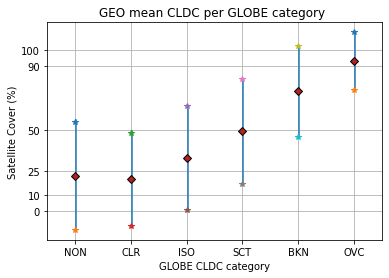

In [ ]:
# Started ploting
plt.figure()

# Created props to hide the meadian line and IQR whiskers and to make the mean point more visible
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
whiskerprops = dict(linestyle='-.', linewidth=0, color='firebrick')

# Put all graphable data into one list (so that each category showed up on one plane)
data = [NON_data_graph,CLR_data_graph,ISO_data_graph,SCT_data_graph,BKN_data_graph,OVC_data_graph]

# Plotted the list
bp = plt.boxplot(data,showmeans=True,showbox=False,showfliers=False,showcaps=False,meanprops=meanpointprops,medianprops=medianprops,whiskerprops=whiskerprops)

# Set the title, yaxis, xaxis and ticks
plt.title('GEO mean CLDC per GLOBE category ')
plt.xlabel('GLOBE CLDC category')
plt.ylabel('Satellite Cover (%)')
plt.xticks([1,2,3,4,5,6],['NON','CLR','ISO','SCT','BKN','OVC'])
plt.yticks([0,10,25,50,90,100],['0','10','25','50','90','100'])
plt.grid(True)

# Drew the whiskers and asterisks
plt.axvline(x=1.01,ymin=0.05,ymax=0.55)
plt.plot(1,NON_upper_ast,'*',)
plt.plot(1,NON_lower_ast,'*')

plt.axvline(x=2.02,ymin=0.06,ymax=0.5)
plt.plot(2,CLR_upper_ast,'*')
plt.plot(2,CLR_lower_ast,'*')

plt.axvline(x=3.03,ymin=0.14,ymax=0.6)
plt.plot(3,ISO_upper_ast,'*')
plt.plot(3,ISO_lower_ast,'*')

plt.axvline(x=4.02,ymin=0.25,ymax=0.73)
plt.plot(4,SCT_upper_ast,'*')
plt.plot(4,SCT_lower_ast,'*')

plt.axvline(x=5.02,ymin=0.47,ymax=0.88)
plt.plot(5,BKN_upper_ast,'*')
plt.plot(5,BKN_lower_ast,'*')

plt.axvline(x=6.01,ymin=0.7,ymax=0.95)
plt.plot(6,OVC_upper_ast,'*')
plt.plot(6,OVC_lower_ast,'*')

plt.show()

Since there were discrepencies between our graph and the other Tues 2PM groups graph we re graphed our data into a normal boxplot by re-ploting the data without the props so that the boxplot would look normal. This allowed us to compare with the other teams plot and see if the way we got the data was correct or not.

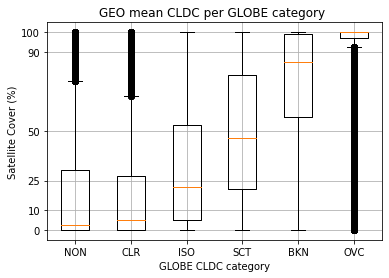

In [ ]:
# Ploting boxplot normally
plt.figure()
bp = plt.boxplot(data,showmeans=False,showbox=True,showfliers=True,showcaps=True,)
plt.title('GEO mean CLDC per GLOBE category ')
plt.xlabel('GLOBE CLDC category')
plt.ylabel('Satellite Cover (%)')
plt.xticks([1,2,3,4,5,6],['NON','CLR','ISO','SCT','BKN','OVC'])
plt.yticks([0,10,25,50,90,100],['0','10','25','50','90','100'])
plt.grid(True)
plt.show()

### Discrepencies with other teams graph
When changing how our graph looks and comparing it to the how the other group's graph looks, there are still some notable diffrences. The general trend of the graph is similar with cloud cover percentages going up as the categories change. However there is still a difference with the quartile ranges between our group's graphs. We think it is because of the way the other team got their data.

Our team got the data by using the getData method below:

---


```
def getData(category,height):           
  useful_data = (globeClouds_combined_df['GEO Total Cloud Cover'] != -99.00) & (globeClouds_combined_df['Total Cloud Cover'] == category)
  data_all = globeClouds_combined_df.loc[useful_data]
  return_data = data_all['GEO ' + height + ' Cloud Cover']
  return return_data
```
---
This method uses the 'Total Cloud Cover' column to find the data that satisfies the category the user wants. However, the other group got there data using the code below:

---
```
# Code from Group Tues 2pm
# For CLR
CLR_subset=df[df['GEO Total Cloud Cover']>0] 
CLR_subset=CLR_subset[CLR_subset['GEO Total Cloud Cover']<=10]
CLR_subset=CLR_subset[CLR_subset['Total Cloud Cover']!=-99]
CLR_subset = CLR_subset[~CLR_subset.index.duplicated()]
```
---
This code gets data using the 'GEO Total Cloud Cover' columns and seeing if the total cloud cover is within the ranges for the category. For the example above of CLR, they are checking if the total cloud cover reported by the satellite is less than or equal to 10 and greater than 0.
 
Our group assumed that the value in column 'Total Cloud Cover' was given by the satellite. However, it seems that the value in the column is given by the ground observer which has greater chance of error than the satellite. The other group used the satellite's data and got the values based off of that. This caused the diffrences in our groups graphs. The way we recived the data was more similar to the way done in the paper since the graph in the paper also compares the satellite data to what the ground observers observed. Thus we feel that we have done our graph correctly.


###How does your plot from objective 1 compare with Figure 3 in paper?
Figure 3 from the paper next to our figure:

<img src="https://ams.silverchair-cdn.com/ams/content_public/journal/jamc/58/11/10.1175_jamc-d-18-0297.1/1/jamc-d-18-0297_1-f3.png?Expires=1598018283&Signature=pM6szvKmXpa7f3fiqh6yOib0YCcXI5s-sCzMEJYXsepuE9bdsNL1PPaTXNwtjykl7iR8rx6uCbGMhsNZvyjkC0kPVwSndtwPHg2c4eU9039lJrlvrxxFLj8SS5gLp59BHCnjZSM7As3P93R4Yaogcsu8ZMrIRMbzHjmDPgX~XmjMEg2dv7X20~JHZs6on8AyfIjMKtXnwQwAxWhVggDjgi2hBVknzwkFYHU3x7iHDXRquVHhxA2Ej427EmKOkbMeTc5naNm1meH91qbG42LsbvYxZC66bxJPZt10NBCiJmlhh5mHhLVlMzJpLgLUeXsYWZjhVTFXBl5vIAuokSGhXA__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width=250 height=250>

<img src="https://drive.google.com/uc?id=1tz_uG-yQgbeHE-gL-vZ1Rptv4hlgTCXZ" width=250 height=250>



The main similarity between this graph and the original Figure 3 graph, is that each CLDC category scales upwards with the Satelite Cover the same way. NON and CLR categories are in the lower Satelite Covers, while BKN and OVC cover the higher levels of Satelite Covers. Additionally, both graphs seem to show the general upward trend between the GLOBE CLDC category and the satelite cloud cover percentage.

The main difference between our graph and the paper's graph is that all the means on our graph's seems to be at a higher point than the means on the paper's figure. For example, in the paper's graph the NON mean is around 8, however our graph's NON mean is around 23. This could be due to the paper using different data when creating these figures since it was written in the past.

##Objective 2
Our second task was to recreate a series of normalized frequency distributions from *Citizen Science Observations*, figure 4B (shown below). For each GLOBE category, the frequency of user-identified categories were recorded in a figure-show type graph. 

Figure 4 in the paper:

<img src="https://ams.silverchair-cdn.com/ams/content_public/journal/jamc/58/11/10.1175_jamc-d-18-0297.1/1/jamc-d-18-0297_1-f4.png?Expires=1598017725&Signature=TGW5OZH2yKYUnl7g80XQ39T1rTy-JTfKR-opoGo6OYswzPybhKRIlSeja~dn66Hvnl1MMhgAdL1elbtN8QLssi2kcpzH0yfd5~-KRkhGrdKDHLYSbJaoUQzmVoBbOYCB3JLi2yR-Dxo4VUIAP69r7Oqy82vjR2Ujy2jtI~nb8ADscKFIZtAM6RR54et~kmywVGEFyJ7yBXMA8-Dq~3MoAo0wwuPNe~B5CUaawwkGePynH5ETFurJMnGRU1AmIYx0SW58pfv5FpdL1FUMmGAkpK27JzOw~vhcvlXyElS9eQ-x9BBRuAxCitojitP7bgyX--AGhyDAo3tPnVFICWAJKw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width=800 height=500>



## Objective 2 Methods
### Calculating GLOBE Entries Method
We first created a method to calculate the amount of GLOBE entries and filtered them into its category of cloud coverage. This method allowed us to quickly calculate the total amount of GLOBE entreis per CLDC and height range (implemented in objective 3).

NONE --> 0% cloud cover 

CLEAR --> 0-10% cloud cover

ISOLATED --> 10-25% cloud cover

SCATTERED --> 25-50% cloud cover

BROKEN --> 50-90% cloud cover

OVERCAST --> 90-100% cloud cover

In [ ]:
# method for calculating GEO cloud entries
# categorizes the data into a category based on cloud cover type (None, clear, isolated, scattered, broken, and overcast)
# returns the amount of entries in this category
def calcGeoEntries(geoCategory, height):
  # boolean condition to filter out bad data
  bad_data = (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] != -99.00)
  # goes through each category and returns the entries from the user with the categorized GEO data
  # filters and counts data with 0% cloud coverage (NONE)
  if geoCategory == 'NON':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] == 0)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # filters and counts data with 0-10% cloud coverage (CLEAR)
  if geoCategory == 'CLR':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 0) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 10)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # filters and counts data with 10-25% cloud coverage (ISOLATED)
  if geoCategory == 'ISO':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 10) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 25)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # filters and counts data with 25-50% cloud coverage (SCATTERED)
  if geoCategory == 'SCT':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 25) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 50)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # filters and counts data with 50-90% cloud coverage (BROKEN)
  if geoCategory == 'BKN':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 50) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 90)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # filters and counts data with 0-10% cloud coverage (OVERCAST)
  if geoCategory == 'OVR':
    user_data = bad_data & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 90) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 100)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  # returns the counted amount of entries per the parametrized category
  return Total_Entries

### Calculating User Entries Method
We then created a method to calculate the amount of user entries per category *given* a GLOBE category. This method allowed us to quickly calculate the total amount of user entries per CLDC and height (implemented in objective 3). For example, the amount of Clear CLDC user entries when the GLOBE CLDC was actually isolated could be calculated using this method.

In [ ]:
#method for calculating userEntries for a specified geoCategory
def calcUserEntries(geoCategory, userCategory, height):
  # boolean condition to filter out bad data
  bad_data = (globeClouds_combined_df[height + ' Cloud Cover'] != -99.00) | (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] != -99.00)
  # goes through each category and returns the entries from the user with the categorized GEO data
  if geoCategory == 'NON':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] == 0)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  if geoCategory == 'CLR':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 0) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 10)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  if geoCategory == 'ISO':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 10) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 25)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  if geoCategory == 'SCT':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 25) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 50)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  if geoCategory == 'BKN':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 50) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] <= 90)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  if geoCategory == 'OVR':
    user_data = bad_data & (globeClouds_combined_df[height+ ' Cloud Cover'] == userCategory) & (globeClouds_combined_df['GEO ' + height + ' Cloud Cover'] > 90)
    Total_Entries = (len(globeClouds_combined_df.loc[user_data]))
  return Total_Entries

### Drawing Graphs Method
We then created a method to draw the graphs in objective 2. There was a total of six graphs that needed to be created, but they all followed the same format, so creating a method was the easiset way to achieve this effectively. Six figure show graphs were created (in order to match figure 4 in *GLOBE Observations*.)


In [ ]:
# method for plotting graphs for each GLOBE category
def drawGraph(type, data, height):
  # format to match Figure 4 in paper
  plt.plot(data, marker='*', markerfacecolor='red', markersize=16, color='black', linewidth=1.5)
  plt.xlabel('GLOBE CLDC category') #x axis label
  plt.ylabel('Frequency') #y axis label
  plt.xticks([0,1,2,3,4,5],['NON','CLR','ISO','SCT','BKN','OVC']) # CLDC categories on x-axis
  plt.yticks([0,.2,.4,.6,.8,1],['0','0.2','0.4','0.6','0.8','1']) # frequency 0-1 on y-axis
  plt.grid(True)
  # graphs user frequency per Category when GLOBE CLDC = NONE
  if type=='NON':
    plt.title('GEO ' +height+ ' CLDC PDF When GLOBE = ' + type)
  # graphs user frequency per Category when GLOBE CLDC = CLEAR
  elif type=='CLR':
    plt.title('GEO ' +height+ ' CLDC PDF When GLOBE = ' + type)
  # graphs user frequency per Category when GLOBE CLDC = ISOLATED
  elif type=='ISO':
    plt.title('GEO ' +height+ '  CLDC PDF When GLOBE = ' + type)
  # graphs user frequency per Category when GLOBE CLDC = SCATTERED
  elif type=='SCT':
    plt.title('GEO ' +height+ ' CLDC PDF When GLOBE = ' + type)
  # graphs user frequency per Category when GLOBE CLDC = BROKEN
  elif type=='BKN':
    plt.title('GEO ' +height+ ' CLDC PDF When GLOBE = ' + type)
  # graphs user frequency per Category when GLOBE CLDC = OVERCAST
  else:
    plt.title('GEO ' +height+ ' CLDC PDF When GLOBE = OVR')

### Implementation of Objective 2
By using the methods described earlier, the amount of GLOBE entries for each category were recorded. Then, the amount of user entries for each category ***given*** a GLOBE category were recorded. Then, the user entries for each category were divided by the total amount of GLOBE entries in that range. Following this calculation, the graphs were constructed for all six GLOBE categories.

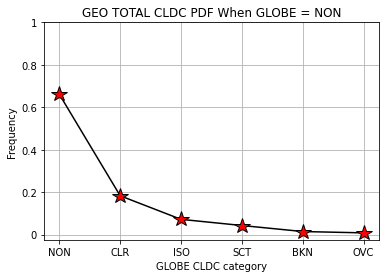

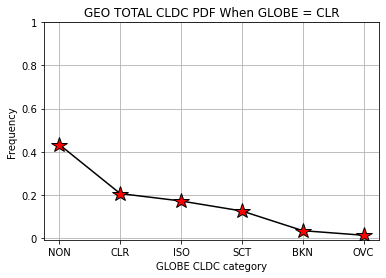

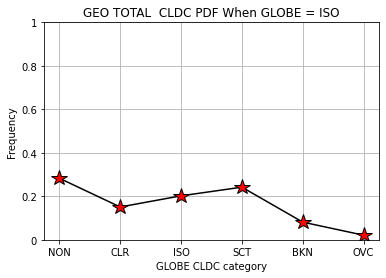

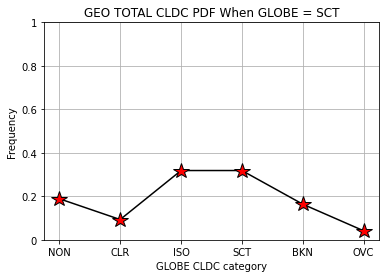

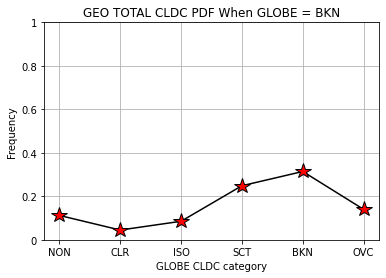

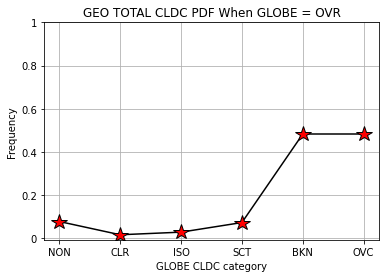

In [ ]:
# Find GEO Entries for each category
Total_GEONON_Entries = calcGeoEntries('NON', 'Total')
Total_GEOCLR_Entries = calcGeoEntries('CLR', 'Total')
Total_GEOISO_Entries = calcGeoEntries('ISO', 'Total')
Total_GEOSCT_Entries = calcGeoEntries('SCT', 'Total')
Total_GEOBKN_Entries = calcGeoEntries('BKN', 'Total')
Total_GEOOVR_Entries = calcGeoEntries('OVR', 'Total')

# Calculating points using method above, for NON graph
Total_NONNON_graph = (calcUserEntries('NON', 'none', 'Total'))/Total_GEONON_Entries
Total_NONCLR_graph = (calcUserEntries('NON', 'few', 'Total'))/Total_GEONON_Entries
Total_NONISO_graph = (calcUserEntries('NON', 'isolated', 'Total'))/Total_GEONON_Entries
Total_NONSCT_graph = (calcUserEntries('NON', 'scattered', 'Total'))/Total_GEONON_Entries
Total_NONBKN_graph = (calcUserEntries('NON', 'broken', 'Total'))/Total_GEONON_Entries
Total_NONOVR_graph = (calcUserEntries('NON', 'overcast', 'Total'))/Total_GEONON_Entries
Total_graph1 = [Total_NONNON_graph, Total_NONCLR_graph, Total_NONISO_graph, Total_NONSCT_graph, Total_NONBKN_graph, Total_NONOVR_graph]
drawGraph('NON', Total_graph1, 'TOTAL')
plt.show()

# Calculating points using method above, for CLR graph
Total_CLRNON_graph = (calcUserEntries('CLR', 'none', 'Total'))/Total_GEOCLR_Entries
Total_CLRCLR_graph = (calcUserEntries('CLR', 'few', 'Total'))/Total_GEOCLR_Entries
Total_CLRISO_graph = (calcUserEntries('CLR', 'isolated', 'Total'))/Total_GEOCLR_Entries
Total_CLRSCT_graph = (calcUserEntries('CLR', 'scattered', 'Total'))/Total_GEOCLR_Entries
Total_CLRBKN_graph = (calcUserEntries('CLR', 'broken', 'Total'))/Total_GEOCLR_Entries
Total_CLROVR_graph = (calcUserEntries('CLR', 'overcast', 'Total'))/Total_GEOCLR_Entries
Total_graph2 = [Total_CLRNON_graph, Total_CLRCLR_graph, Total_CLRISO_graph, Total_CLRSCT_graph, Total_CLRBKN_graph, Total_CLROVR_graph]
drawGraph('CLR', Total_graph2, 'TOTAL')
plt.show()

# Calculating points using method above, for ISO graph
Total_ISONON_graph = (calcUserEntries('ISO', 'none', 'Total'))/Total_GEOISO_Entries
Total_ISOCLR_graph = (calcUserEntries('ISO', 'few', 'Total'))/Total_GEOISO_Entries
Total_ISOISO_graph = (calcUserEntries('ISO', 'isolated', 'Total'))/Total_GEOISO_Entries
Total_ISOSCT_graph = (calcUserEntries('ISO', 'scattered', 'Total'))/Total_GEOISO_Entries
Total_ISOBKN_graph = (calcUserEntries('ISO', 'broken', 'Total'))/Total_GEOISO_Entries
Total_ISOOVR_graph = (calcUserEntries('ISO', 'overcast', 'Total'))/Total_GEOISO_Entries
Total_graph3 = [Total_ISONON_graph, Total_ISOCLR_graph, Total_ISOISO_graph, Total_ISOSCT_graph, Total_ISOBKN_graph, Total_ISOOVR_graph]
drawGraph('ISO', Total_graph3, 'TOTAL')
plt.show()

# Calculating points using method above, for SCT graph
Total_SCTNON_graph = (calcUserEntries('SCT', 'none', 'Total'))/Total_GEOSCT_Entries
Total_SCTCLR_graph = (calcUserEntries('SCT', 'few', 'Total'))/Total_GEOSCT_Entries
Total_SCTSCT_graph = (calcUserEntries('SCT', 'isolated', 'Total'))/Total_GEOSCT_Entries
Total_SCTSCT_graph = (calcUserEntries('SCT', 'scattered', 'Total'))/Total_GEOSCT_Entries
Total_SCTBKN_graph = (calcUserEntries('SCT', 'broken', 'Total'))/Total_GEOSCT_Entries
Total_SCTOVR_graph = (calcUserEntries('SCT', 'overcast', 'Total'))/Total_GEOSCT_Entries
Total_graph4 = [Total_SCTNON_graph, Total_SCTCLR_graph, Total_SCTSCT_graph, Total_SCTSCT_graph, Total_SCTBKN_graph, Total_SCTOVR_graph]
drawGraph('SCT', Total_graph4, 'TOTAL')
plt.show()

# Calculating points using method above, for BKN graph
Total_BKNNON_graph = (calcUserEntries('BKN', 'none', 'Total'))/Total_GEOBKN_Entries
Total_BKNCLR_graph = (calcUserEntries('BKN', 'few', 'Total'))/Total_GEOBKN_Entries
Total_BKNISO_graph = (calcUserEntries('BKN', 'isolated', 'Total'))/Total_GEOBKN_Entries
Total_BKNSCT_graph = (calcUserEntries('BKN', 'scattered', 'Total'))/Total_GEOBKN_Entries
Total_BKNBKN_graph = (calcUserEntries('BKN', 'broken', 'Total'))/Total_GEOBKN_Entries
Total_BKNOVR_graph = (calcUserEntries('BKN', 'overcast', 'Total'))/Total_GEOBKN_Entries
Total_graph5 = [Total_BKNNON_graph, Total_BKNCLR_graph, Total_BKNISO_graph, Total_BKNSCT_graph, Total_BKNBKN_graph, Total_BKNOVR_graph]
drawGraph('BKN', Total_graph5, 'TOTAL')
plt.show()

# Calculating points using method above, for OVR graph
Total_OVRNON_graph = (calcUserEntries('OVR', 'none', 'Total'))/Total_GEOOVR_Entries
Total_OVRCLR_graph = (calcUserEntries('OVR', 'few', 'Total'))/Total_GEOOVR_Entries
Total_OVRISO_graph = (calcUserEntries('OVR', 'isolated', 'Total'))/Total_GEOOVR_Entries
Total_OVRSCT_graph = (calcUserEntries('OVR', 'scattered', 'Total'))/Total_GEOOVR_Entries
Total_OVRBKN_graph = (calcUserEntries('OVR', 'broken', 'Total'))/Total_GEOOVR_Entries
Total_OVROVR_graph = (calcUserEntries('OVR', 'overcast', 'Total'))/Total_GEOOVR_Entries
Total_graph6 = [Total_OVRNON_graph, Total_OVRCLR_graph, Total_OVRISO_graph, Total_OVRSCT_graph, Total_OVROVR_graph, Total_OVROVR_graph]
drawGraph('OVR', Total_graph6, 'TOTAL')
plt.show()

###How does your result from Objective 2 compare with Figure 4 from the paper?

Comparing Figure 4B in the paper to ours:

<img src="https://ams.silverchair-cdn.com/ams/content_public/journal/jamc/58/11/10.1175_jamc-d-18-0297.1/1/jamc-d-18-0297_1-f4.png?Expires=1598017725&Signature=TGW5OZH2yKYUnl7g80XQ39T1rTy-JTfKR-opoGo6OYswzPybhKRIlSeja~dn66Hvnl1MMhgAdL1elbtN8QLssi2kcpzH0yfd5~-KRkhGrdKDHLYSbJaoUQzmVoBbOYCB3JLi2yR-Dxo4VUIAP69r7Oqy82vjR2Ujy2jtI~nb8ADscKFIZtAM6RR54et~kmywVGEFyJ7yBXMA8-Dq~3MoAo0wwuPNe~B5CUaawwkGePynH5ETFurJMnGRU1AmIYx0SW58pfv5FpdL1FUMmGAkpK27JzOw~vhcvlXyElS9eQ-x9BBRuAxCitojitP7bgyX--AGhyDAo3tPnVFICWAJKw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width=600 height=375> <img src="https://drive.google.com/uc?id=1027DnPpurWHen98sDctqo8s0oUbd3A4G" width=600 height=375>

The similarity between all of objective 2 graphs compare to all of figure 4 graphs is that they are identical pattern-wise, except for ISO and SCT. A small difference between all of our graphs compare to all of figure 4 graphs are our graphs don't have point markers whereas all of figure 4 graphs do. Another thing that is different between the graphs is that our graphs have gridlines while figure 4 graphs don't.

However, there are some important differences in terms of specific points.
Note that all values below are not the exact values, but approximates judging from observations.

**CLR** - While not as drastic of a difference in comparison to ISO and SCT, this one has, nevertheless, differences.
* NON - Fig 4: 0.55; Obj 2: 0.45
* CLR - Fig 4: 0.30; Obj 2: 0.20
* ISO - Fig 4: 0.10; Obj 2: 0.17
* SCT - Fig 4: 0.05; Obj 2: 0.13
* BNK and OVC are identical, at least in terms of observations.

**ISO** - This one has major differences that make the patterns between fig 4 and obj 2's versions different.
* NON - Fig 4: 0.25; Obj 2: 0.30
* CLR - Fig 4: 0.35; Obj 2: 0.15
* ISO - Fig 4: 0.20; Obj 2: 0.20 (identical)
* SCT - Fig 4: 0.15; Obj 2: 0.25
* BNK - Fig 4: 0.05; Obj 2: 0.10
* OVC is too close to tell.

**SCT** - This one has major differences that make the patterns between fig 4 and obj 2's versions different.
* NON - Fig 4: 0.10; Obj 2: 0.19
* CLR - Fig 4: 0.21; Obj 2: 0.10
* ISO - Fig 4: 0.25; Obj 2: 0.17
* SCT - Fig 4: 0.25; Obj 2: 0.30
* BNK - Fig 4: 0.10; Obj 2: 0.17
* OVC - Fig 4: 0.02; Obj 2: 0.05

Obj 2's versions **NON**, **BNK**, and **OVC** graphs are completely identical to the fig 4 one.

Now the objective 2 graphs represent the human observations from the surface, while the figure 4 ones represent the ones taken from satellites. The major reason behind such a difference in data, is because it is hard for human eyes and judgement to tell the amount of a certain category, such as ISO (isolated), resulting in overestimations and underestimations in those specific middle categories.

As a result of this, looking at human observations may not be ideal for determining frequency.

##Objective 3
Our third task was to re-create the figures from objective 1 and 2, but this time instead of using the total cloud cover we had to use high, mid, and low cloud cover data. We started off by using the same method to get data in objective 1 however instead of putting 'total' for the height we put 'High', 'Mid', and 'Low'. By separating by category, we can examine the differences in user entries and satellite data by altitude.

In [ ]:
# Objective 1 
# Gathering Data

# Used Method to get data for all categories
NON_data_graph_High = getData('none','High')
NON_data_graph_Mid = getData('none','Mid')
NON_data_graph_Low = getData('none','Low')

CLR_data_graph_High = getData('few','High')
CLR_data_graph_Mid = getData('few','Mid')
CLR_data_graph_Low = getData('few','Low')

ISO_data_graph_High = getData('isolated','High')
ISO_data_graph_Mid = getData('isolated','Mid')
ISO_data_graph_Low = getData('isolated','Low')

SCT_data_graph_High = getData('scattered','High')
SCT_data_graph_Mid = getData('scattered','Mid')
SCT_data_graph_Low = getData('scattered','Low')

BKN_data_graph_High = getData('broken','High')
BKN_data_graph_Mid = getData('broken','Mid')
BKN_data_graph_Low = getData('broken','Low')

OVC_data_graph_High = getData('overcast','High')
OVC_data_graph_Mid = getData('overcast','Mid')
OVC_data_graph_Low = getData('overcast','Low')

After getting all the data we then calculated the mean and one standard deviation above and below the mean where the asterisks would go for all three heights and all 6 categories.

In [ ]:
# Found locations of asterisks for each category and height
NON_upper_ast_H = (NON_data_graph_High.mean()) + (NON_data_graph_High.std())
NON_lower_ast_H = (NON_data_graph_High.mean()) - (NON_data_graph_High.std())
NON_upper_ast_M = (NON_data_graph_Mid.mean()) + (NON_data_graph_Mid.std())
NON_lower_ast_M = (NON_data_graph_Mid.mean()) - (NON_data_graph_Mid.std())
NON_upper_ast_L = (NON_data_graph_Low.mean()) + (NON_data_graph_Low.std())
NON_lower_ast_L = (NON_data_graph_Low.mean()) - (NON_data_graph_Low.std())

CLR_upper_ast_H = (CLR_data_graph_High.mean()) + (CLR_data_graph_High.std())
CLR_lower_ast_H = (CLR_data_graph_High.mean()) - (CLR_data_graph_High.std())
CLR_upper_ast_M = (CLR_data_graph_Mid.mean()) + (CLR_data_graph_Mid.std())
CLR_lower_ast_M = (CLR_data_graph_Mid.mean()) - (CLR_data_graph_Mid.std())
CLR_upper_ast_L = (CLR_data_graph_Low.mean()) + (CLR_data_graph_Low.std())
CLR_lower_ast_L = (CLR_data_graph_Low.mean()) - (CLR_data_graph_Low.std())

ISO_upper_ast_H = (ISO_data_graph_High.mean()) + (ISO_data_graph_High.std())
ISO_lower_ast_H = (ISO_data_graph_High.mean()) - (ISO_data_graph_High.std())
ISO_upper_ast_M = (ISO_data_graph_Mid.mean()) + (ISO_data_graph_Mid.std())
ISO_lower_ast_M = (ISO_data_graph_Mid.mean()) - (ISO_data_graph_Mid.std())
ISO_upper_ast_L = (ISO_data_graph_Low.mean()) + (ISO_data_graph_Low.std())
ISO_lower_ast_L = (ISO_data_graph_Low.mean()) - (ISO_data_graph_Low.std())

SCT_upper_ast_H = (SCT_data_graph_High.mean()) + (SCT_data_graph_High.std())
SCT_lower_ast_H = (SCT_data_graph_High.mean()) - (SCT_data_graph_High.std())
SCT_upper_ast_M = (SCT_data_graph_Mid.mean()) + (SCT_data_graph_Mid.std())
SCT_lower_ast_M = (SCT_data_graph_Mid.mean()) - (SCT_data_graph_Mid.std())
SCT_upper_ast_L = (SCT_data_graph_Low.mean()) + (SCT_data_graph_Low.std())
SCT_lower_ast_L = (SCT_data_graph_Low.mean()) - (SCT_data_graph_Low.std())

BKN_upper_ast_H = (BKN_data_graph_High.mean()) + (BKN_data_graph_High.std())
BKN_lower_ast_H = (BKN_data_graph_High.mean()) - (BKN_data_graph_High.std())
BKN_upper_ast_M = (BKN_data_graph_Mid.mean()) + (BKN_data_graph_Mid.std())
BKN_lower_ast_M = (BKN_data_graph_Mid.mean()) - (BKN_data_graph_Mid.std())
BKN_upper_ast_L = (BKN_data_graph_Low.mean()) + (BKN_data_graph_Low.std())
BKN_lower_ast_L = (BKN_data_graph_Low.mean()) - (BKN_data_graph_Low.std())

OVC_upper_ast_H = (OVC_data_graph_High.mean()) + (OVC_data_graph_High.std())
OVC_lower_ast_H = (OVC_data_graph_High.mean()) - (OVC_data_graph_High.std())
OVC_upper_ast_M = (OVC_data_graph_Mid.mean()) + (OVC_data_graph_Mid.std())
OVC_lower_ast_M = (OVC_data_graph_Mid.mean()) - (OVC_data_graph_Mid.std())
OVC_upper_ast_L = (OVC_data_graph_Low.mean()) + (OVC_data_graph_Low.std())
OVC_lower_ast_L = (OVC_data_graph_Low.mean()) - (OVC_data_graph_Low.std())

We then started ploting our three graphs. We created props again for the meanpoint, median and whiskers. The meanpoint prop made the meanpoint more visable, the medianprop and whiskerprop got rid of the median line and whiskers respectively.

In [ ]:
# Started ploting

# Created props to hide the meadian line and IQR whiskers and to make the mean point more visible
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
whiskerprops = dict(linestyle='-.', linewidth=0, color='firebrick')

After this we created a method to setup the graph which took a height value. This method set up the title, y-axis label, x-axis label, and the ticks for each axis.

In [ ]:
# Method to set the title, yaxis, xaxis and ticks
def setupGraph(height):
  plt.title('GEO '+height+' Cloud Cover mean CLDC per GLOBE category ')
  plt.xlabel('GLOBE CLDC category')
  plt.ylabel('Satellite Cover (%)')
  plt.xticks([1,2,3,4,5,6],['NON','CLR','ISO','SCT','BKN','OVC'])
  plt.yticks([0,10,25,50,90,100],['0','10','25','50','90','100'])
  plt.grid(True)

We then created another method to draw the asterisks which took a height value and drew the correct asterisks depending on the height given 

In [ ]:
# Method to draw asteriks
def drawAsterisks(height):
  if height == 'High':
    plt.plot(1,NON_upper_ast_H,'*')
    plt.plot(1,NON_lower_ast_H,'*')
    plt.plot(2,CLR_upper_ast_H,'*')
    plt.plot(2,CLR_lower_ast_H,'*')
    plt.plot(3,ISO_upper_ast_H,'*')
    plt.plot(3,ISO_lower_ast_H,'*')
    plt.plot(4,SCT_upper_ast_H,'*')
    plt.plot(4,SCT_lower_ast_H,'*')
    plt.plot(5,BKN_upper_ast_H,'*')
    plt.plot(5,BKN_lower_ast_H,'*')
    plt.plot(6,OVC_upper_ast_H,'*')
    plt.plot(6,OVC_lower_ast_H,'*')
  elif height == 'Mid':
    plt.plot(1,NON_upper_ast_M,'*')
    plt.plot(1,NON_lower_ast_M,'*')
    plt.plot(2,CLR_upper_ast_M,'*')
    plt.plot(2,CLR_lower_ast_M,'*')
    plt.plot(3,ISO_upper_ast_M,'*')
    plt.plot(3,ISO_lower_ast_M,'*')
    plt.plot(4,SCT_upper_ast_M,'*')
    plt.plot(4,SCT_lower_ast_M,'*')
    plt.plot(5,BKN_upper_ast_M,'*')
    plt.plot(5,BKN_lower_ast_M,'*')
    plt.plot(6,OVC_upper_ast_M,'*')
    plt.plot(6,OVC_lower_ast_M,'*')
  elif height == 'Low':
    plt.plot(1,NON_upper_ast_L,'*')
    plt.plot(1,NON_lower_ast_L,'*')
    plt.plot(2,CLR_upper_ast_L,'*')
    plt.plot(2,CLR_lower_ast_L,'*')
    plt.plot(3,ISO_upper_ast_L,'*')
    plt.plot(3,ISO_lower_ast_L,'*')
    plt.plot(4,SCT_upper_ast_L,'*')
    plt.plot(4,SCT_lower_ast_L,'*')
    plt.plot(5,BKN_upper_ast_L,'*')
    plt.plot(5,BKN_lower_ast_L,'*')
    plt.plot(6,OVC_upper_ast_L,'*')
    plt.plot(6,OVC_lower_ast_L,'*')

We then put all the graphable data into three lists based on the high, low, and mid cloud cover. And then ploted each of these lists as a boxplot and called the setupGraph and drawAsterisks method sending through the corresponding height value. Lastly, we drew in the lines for whiskers to connect the asterisks. 

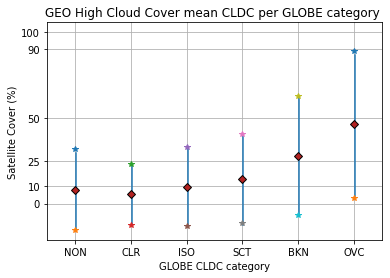

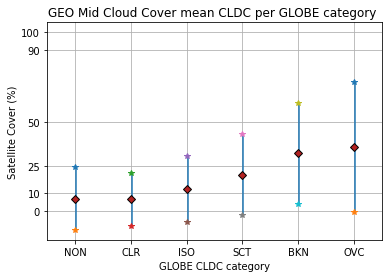

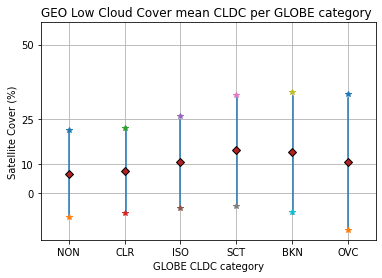

In [ ]:
# Put all graphable data into one list (so that each category showed up on one plane)
data_H = [NON_data_graph_High,CLR_data_graph_High,ISO_data_graph_High,SCT_data_graph_High,BKN_data_graph_High,OVC_data_graph_High]
data_M = [NON_data_graph_Mid,CLR_data_graph_Mid,ISO_data_graph_Mid,SCT_data_graph_Mid,BKN_data_graph_Mid,OVC_data_graph_Mid]
data_L = [NON_data_graph_Low,CLR_data_graph_Low,ISO_data_graph_Low,SCT_data_graph_Low,BKN_data_graph_Low,OVC_data_graph_Low]

# High Figure
plt.figure()
# Plotted the list
bp = plt.boxplot(data_H,showmeans=True,showbox=False,showfliers=False,showcaps=False,meanprops=meanpointprops,medianprops=medianprops,whiskerprops=whiskerprops)
# Used method to setup graph
setupGraph('High')

# Drew the whiskers and asterisks
plt.axvline(x=1.01,ymin=0.05,ymax=0.4)
plt.axvline(x=2.02,ymin=0.07,ymax=0.35)
plt.axvline(x=3.03,ymin=0.07,ymax=0.42)
plt.axvline(x=4.02,ymin=0.068,ymax=0.48)
plt.axvline(x=5.02,ymin=0.11,ymax=0.66)
plt.axvline(x=6.01,ymin=0.2,ymax=0.85)
drawAsterisks('High')

plt.show()

# Mid Figure
plt.figure()
bp2 = plt.boxplot(data_M,showmeans=True,showbox=False,showfliers=False,showcaps=False,meanprops=meanpointprops,medianprops=medianprops,whiskerprops=whiskerprops)
setupGraph('Mid')
plt.axvline(x=1.01,ymin=0.05,ymax=0.32)
plt.axvline(x=2.02,ymin=0.07,ymax=0.3)
plt.axvline(x=3.03,ymin=0.08,ymax=0.38)
plt.axvline(x=4.02,ymin=0.12,ymax=0.48)
plt.axvline(x=5.02,ymin=0.16,ymax=0.62)
plt.axvline(x=6.01,ymin=0.13,ymax=0.72)
drawAsterisks('Mid')

plt.show()

# Low Figure
plt.figure()
bp3 = plt.boxplot(data_L,showmeans=True,showbox=False,showfliers=False,showcaps=False,meanprops=meanpointprops,medianprops=medianprops,whiskerprops=whiskerprops)
setupGraph('Low')
plt.axvline(x=1.01,ymin=0.1,ymax=0.5)
plt.axvline(x=2.02,ymin=0.12,ymax=0.52)
plt.axvline(x=3.00,ymin=0.14,ymax=0.55)
plt.axvline(x=4.02,ymin=0.15,ymax=0.65)
plt.axvline(x=5.02,ymin=0.12,ymax=0.66)
plt.axvline(x=6.01,ymin=0.05,ymax=0.65)
drawAsterisks('Low')

plt.show()

The low cloud cover graph reveals that when a ground observer reports broken or overcast cloud cover the satellite's average cloud cover is lower that expected for that category, especially compared to the mid and hihg level clouds. This brings up new questions like, why is there so much disagreement between the two observers when the ground observer reports extensive coverage at low levels? Are there typically mid and upper level clouds (that may be hiding lower altitude clouds from the satellite) when the low level cloud coverage is broken or overcast?

###Implementation for Objective 3 - Part 2


First, the amount of globe entries by height and category were calculated by using the previous method defined above.

In [ ]:
# Objective 2
# Find GEO Entries for each height category
High_GEONON_Entries = calcGeoEntries('NON', 'High')
High_GEOCLR_Entries = calcGeoEntries('CLR', 'High')
High_GEOISO_Entries = calcGeoEntries('ISO', 'High')
High_GEOSCT_Entries = calcGeoEntries('SCT', 'High')
High_GEOBKN_Entries = calcGeoEntries('BKN', 'High')
High_GEOOVR_Entries = calcGeoEntries('OVR', 'High')

# Find GEO Entries for each height category
Mid_GEONON_Entries = calcGeoEntries('NON', 'Mid')
Mid_GEOCLR_Entries = calcGeoEntries('CLR', 'Mid')
Mid_GEOISO_Entries = calcGeoEntries('ISO', 'Mid')
Mid_GEOSCT_Entries = calcGeoEntries('SCT', 'Mid')
Mid_GEOBKN_Entries = calcGeoEntries('BKN', 'Mid')
Mid_GEOOVR_Entries = calcGeoEntries('OVR', 'Mid')

# Find GEO Entries for each height category
Low_GEONON_Entries = calcGeoEntries('NON', 'Low')
Low_GEOCLR_Entries = calcGeoEntries('CLR', 'Low')
Low_GEOISO_Entries = calcGeoEntries('ISO', 'Low')
Low_GEOSCT_Entries = calcGeoEntries('SCT', 'Low')
Low_GEOBKN_Entries = calcGeoEntries('BKN', 'Low')
Low_GEOOVR_Entries = calcGeoEntries('OVR', 'Low')

Next, the amount of user entries per category and height "HIGH" were recorded. This number was then divided by the total amount of GLOBE entries for category and height "HIGH." The graphs were then constructed using the 'drawGraph' method defined above. These graphs show the frequency of CLDC 

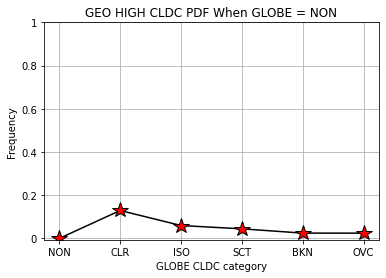

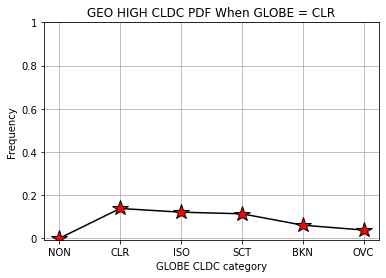

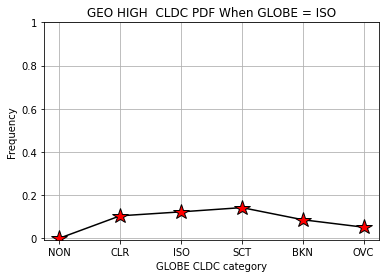

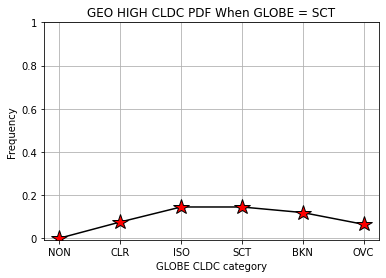

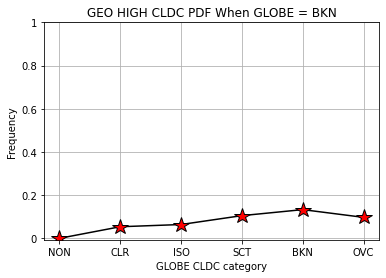

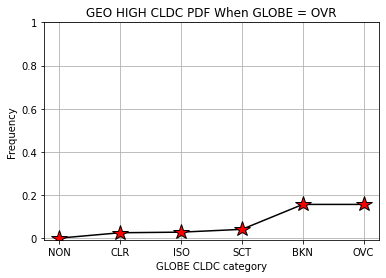

In [ ]:
# Calculating points using method above, for NON graph with high entries
High_NONNON_graph = (calcUserEntries('NON', 'none', 'High'))/High_GEONON_Entries
High_NONCLR_graph = (calcUserEntries('NON', 'few', 'High'))/High_GEONON_Entries
High_NONISO_graph = (calcUserEntries('NON', 'isolated', 'High'))/High_GEONON_Entries
High_NONSCT_graph = (calcUserEntries('NON', 'scattered', 'High'))/High_GEONON_Entries
High_NONBKN_graph = (calcUserEntries('NON', 'broken', 'High'))/High_GEONON_Entries
High_NONOVR_graph = (calcUserEntries('NON', 'overcast', 'High'))/High_GEONON_Entries
High_graph1 = [High_NONNON_graph, High_NONCLR_graph, High_NONISO_graph, High_NONSCT_graph, High_NONBKN_graph, High_NONOVR_graph]
drawGraph('NON', High_graph1, 'HIGH')
plt.show()

# Calculating points using method above, for CLR graph with high entries
High_CLRNON_graph = (calcUserEntries('CLR', 'none', 'High'))/High_GEOCLR_Entries
High_CLRCLR_graph = (calcUserEntries('CLR', 'few', 'High'))/High_GEOCLR_Entries
High_CLRISO_graph = (calcUserEntries('CLR', 'isolated', 'High'))/High_GEOCLR_Entries
High_CLRSCT_graph = (calcUserEntries('CLR', 'scattered', 'High'))/High_GEOCLR_Entries
High_CLRBKN_graph = (calcUserEntries('CLR', 'broken', 'High'))/High_GEOCLR_Entries
High_CLROVR_graph = (calcUserEntries('CLR', 'overcast', 'High'))/High_GEOCLR_Entries
High_graph2 = [High_CLRNON_graph, High_CLRCLR_graph, High_CLRISO_graph, High_CLRSCT_graph, High_CLRBKN_graph, High_CLROVR_graph]
drawGraph('CLR', High_graph2, 'HIGH')
plt.show()

# Calculating points using method above, for ISO graph with high entries
High_ISONON_graph = (calcUserEntries('ISO', 'none', 'High'))/High_GEOISO_Entries
High_ISOCLR_graph = (calcUserEntries('ISO', 'few', 'High'))/High_GEOISO_Entries
High_ISOISO_graph = (calcUserEntries('ISO', 'isolated', 'High'))/High_GEOISO_Entries
High_ISOSCT_graph = (calcUserEntries('ISO', 'scattered', 'High'))/High_GEOISO_Entries
High_ISOBKN_graph = (calcUserEntries('ISO', 'broken', 'High'))/High_GEOISO_Entries
High_ISOOVR_graph = (calcUserEntries('ISO', 'overcast', 'High'))/High_GEOISO_Entries
High_graph3 = [High_ISONON_graph, High_ISOCLR_graph, High_ISOISO_graph, High_ISOSCT_graph, High_ISOBKN_graph, High_ISOOVR_graph]
drawGraph('ISO', High_graph3, 'HIGH')
plt.show()

# Calculating points using method above, for SCT graph with high entries
High_SCTNON_graph = (calcUserEntries('SCT', 'none', 'High'))/High_GEOSCT_Entries
High_SCTCLR_graph = (calcUserEntries('SCT', 'few', 'High'))/High_GEOSCT_Entries
High_SCTSCT_graph = (calcUserEntries('SCT', 'isolated', 'High'))/High_GEOSCT_Entries
High_SCTSCT_graph = (calcUserEntries('SCT', 'scattered', 'High'))/High_GEOSCT_Entries
High_SCTBKN_graph = (calcUserEntries('SCT', 'broken', 'High'))/High_GEOSCT_Entries
High_SCTOVR_graph = (calcUserEntries('SCT', 'overcast', 'High'))/High_GEOSCT_Entries
High_graph4 = [High_SCTNON_graph, High_SCTCLR_graph, High_SCTSCT_graph, High_SCTSCT_graph, High_SCTBKN_graph, High_SCTOVR_graph]
drawGraph('SCT', High_graph4, 'HIGH')
plt.show()

# Calculating data points using method above, for BKN graph with high entries
High_BKNNON_graph = (calcUserEntries('BKN', 'none', 'High'))/High_GEOBKN_Entries
High_BKNCLR_graph = (calcUserEntries('BKN', 'few', 'High'))/High_GEOBKN_Entries
High_BKNISO_graph = (calcUserEntries('BKN', 'isolated', 'High'))/High_GEOBKN_Entries
High_BKNSCT_graph = (calcUserEntries('BKN', 'scattered', 'High'))/High_GEOBKN_Entries
High_BKNBKN_graph = (calcUserEntries('BKN', 'broken', 'High'))/High_GEOBKN_Entries
High_BKNOVR_graph = (calcUserEntries('BKN', 'overcast', 'High'))/High_GEOBKN_Entries
High_graph5 = [High_BKNNON_graph, High_BKNCLR_graph, High_BKNISO_graph, High_BKNSCT_graph, High_BKNBKN_graph, High_BKNOVR_graph]
drawGraph('BKN', High_graph5, 'HIGH')
plt.show()

# Calculating data points using method above, for OVR graph with high entries
High_OVRNON_graph = (calcUserEntries('OVR', 'none', 'High'))/High_GEOOVR_Entries
High_OVRCLR_graph = (calcUserEntries('OVR', 'few', 'High'))/High_GEOOVR_Entries
High_OVRISO_graph = (calcUserEntries('OVR', 'isolated', 'High'))/High_GEOOVR_Entries
High_OVRSCT_graph = (calcUserEntries('OVR', 'scattered', 'High'))/High_GEOOVR_Entries
High_OVRBKN_graph = (calcUserEntries('OVR', 'broken', 'High'))/High_GEOOVR_Entries
High_OVROVR_graph = (calcUserEntries('OVR', 'overcast', 'High'))/High_GEOOVR_Entries
High_graph6 = [High_OVRNON_graph, High_OVRCLR_graph, High_OVRISO_graph, High_OVRSCT_graph, High_OVROVR_graph, High_OVROVR_graph]
drawGraph('OVR', High_graph6, 'HIGH')
plt.show()

Next, the amount of user entries per category and height "MID" were recorded. This number was then divided by the total amount of GLOBE entries for category and height "MID." The graphs were then constructed using the 'drawGraph' method defined above. These graphs show how accurate the user was in determining the category of mid-level altitude clouds.

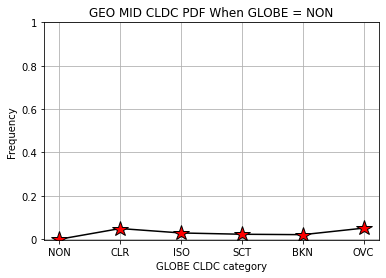

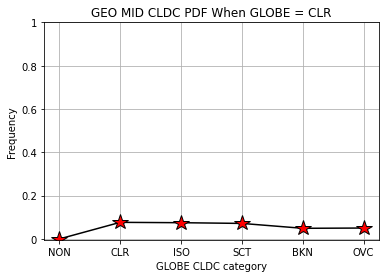

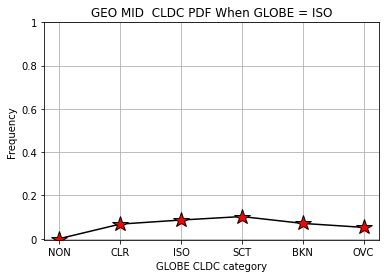

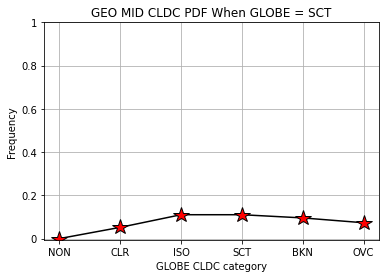

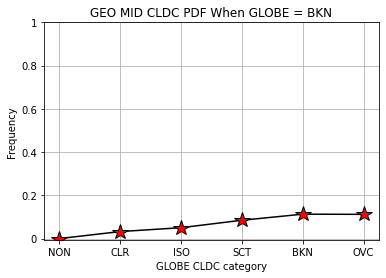

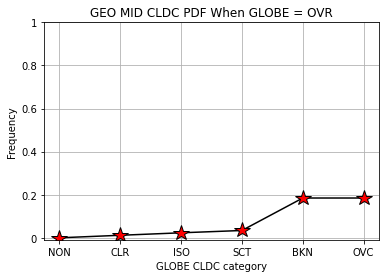

In [ ]:
# Calculating points for MID level, NON category graph
Mid_NONNON_graph = (calcUserEntries('NON', 'none', 'Mid'))/Mid_GEONON_Entries
Mid_NONCLR_graph = (calcUserEntries('NON', 'few', 'Mid'))/Mid_GEONON_Entries
Mid_NONISO_graph = (calcUserEntries('NON', 'isolated', 'Mid'))/Mid_GEONON_Entries
Mid_NONSCT_graph = (calcUserEntries('NON', 'scattered', 'Mid'))/Mid_GEONON_Entries
Mid_NONBKN_graph = (calcUserEntries('NON', 'broken', 'Mid'))/Mid_GEONON_Entries
Mid_NONOVR_graph = (calcUserEntries('NON', 'overcast', 'Mid'))/Mid_GEONON_Entries
Mid_graph1 = [Mid_NONNON_graph, Mid_NONCLR_graph, Mid_NONISO_graph, Mid_NONSCT_graph, Mid_NONBKN_graph, Mid_NONOVR_graph]
drawGraph('NON', Mid_graph1, 'MID')
plt.show()

# Calculating points for MID level, CLR category graph
Mid_CLRNON_graph = (calcUserEntries('CLR', 'none', 'Mid'))/Mid_GEOCLR_Entries
Mid_CLRCLR_graph = (calcUserEntries('CLR', 'few', 'Mid'))/Mid_GEOCLR_Entries
Mid_CLRISO_graph = (calcUserEntries('CLR', 'isolated', 'Mid'))/Mid_GEOCLR_Entries
Mid_CLRSCT_graph = (calcUserEntries('CLR', 'scattered', 'Mid'))/Mid_GEOCLR_Entries
Mid_CLRBKN_graph = (calcUserEntries('CLR', 'broken', 'Mid'))/Mid_GEOCLR_Entries
Mid_CLROVR_graph = (calcUserEntries('CLR', 'overcast', 'Mid'))/Mid_GEOCLR_Entries
Mid_graph2 = [Mid_CLRNON_graph, Mid_CLRCLR_graph, Mid_CLRISO_graph, Mid_CLRSCT_graph, Mid_CLRBKN_graph, Mid_CLROVR_graph]
drawGraph('CLR', Mid_graph2, 'MID')
plt.show()

# Calculating points for MID level, ISO category graph
Mid_ISONON_graph = (calcUserEntries('ISO', 'none', 'Mid'))/Mid_GEOISO_Entries
Mid_ISOCLR_graph = (calcUserEntries('ISO', 'few', 'Mid'))/Mid_GEOISO_Entries
Mid_ISOISO_graph = (calcUserEntries('ISO', 'isolated', 'Mid'))/Mid_GEOISO_Entries
Mid_ISOSCT_graph = (calcUserEntries('ISO', 'scattered', 'Mid'))/Mid_GEOISO_Entries
Mid_ISOBKN_graph = (calcUserEntries('ISO', 'broken', 'Mid'))/Mid_GEOISO_Entries
Mid_ISOOVR_graph = (calcUserEntries('ISO', 'overcast', 'Mid'))/Mid_GEOISO_Entries
Mid_graph3 = [Mid_ISONON_graph, Mid_ISOCLR_graph, Mid_ISOISO_graph, Mid_ISOSCT_graph, Mid_ISOBKN_graph, Mid_ISOOVR_graph]
drawGraph('ISO', Mid_graph3, 'MID')
plt.show()

# Calculating points for MID level, SCT category graph
Mid_SCTNON_graph = (calcUserEntries('SCT', 'none', 'Mid'))/Mid_GEOSCT_Entries
Mid_SCTCLR_graph = (calcUserEntries('SCT', 'few', 'Mid'))/Mid_GEOSCT_Entries
Mid_SCTSCT_graph = (calcUserEntries('SCT', 'isolated', 'Mid'))/Mid_GEOSCT_Entries
Mid_SCTSCT_graph = (calcUserEntries('SCT', 'scattered', 'Mid'))/Mid_GEOSCT_Entries
Mid_SCTBKN_graph = (calcUserEntries('SCT', 'broken', 'Mid'))/Mid_GEOSCT_Entries
Mid_SCTOVR_graph = (calcUserEntries('SCT', 'overcast', 'Mid'))/Mid_GEOSCT_Entries
Mid_graph4 = [Mid_SCTNON_graph, Mid_SCTCLR_graph, Mid_SCTSCT_graph, Mid_SCTSCT_graph, Mid_SCTBKN_graph, Mid_SCTOVR_graph]
drawGraph('SCT', Mid_graph4, 'MID')
plt.show()

# Calculating points for MID level, BKN category graph
Mid_BKNNON_graph = (calcUserEntries('BKN', 'none', 'Mid'))/Mid_GEOBKN_Entries
Mid_BKNCLR_graph = (calcUserEntries('BKN', 'few', 'Mid'))/Mid_GEOBKN_Entries
Mid_BKNISO_graph = (calcUserEntries('BKN', 'isolated', 'Mid'))/Mid_GEOBKN_Entries
Mid_BKNSCT_graph = (calcUserEntries('BKN', 'scattered', 'Mid'))/Mid_GEOBKN_Entries
Mid_BKNBKN_graph = (calcUserEntries('BKN', 'broken', 'Mid'))/Mid_GEOBKN_Entries
Mid_BKNOVR_graph = (calcUserEntries('BKN', 'overcast', 'Mid'))/Mid_GEOBKN_Entries
Mid_graph5 = [Mid_BKNNON_graph, Mid_BKNCLR_graph, Mid_BKNISO_graph, Mid_BKNSCT_graph, Mid_BKNBKN_graph, Mid_BKNOVR_graph]
drawGraph('BKN', Mid_graph5, 'MID')
plt.show()

# Calculating points for MID level, OVR category graph
Mid_OVRNON_graph = (calcUserEntries('OVR', 'none', 'Mid'))/Mid_GEOOVR_Entries
Mid_OVRCLR_graph = (calcUserEntries('OVR', 'few', 'Mid'))/Mid_GEOOVR_Entries
Mid_OVRISO_graph = (calcUserEntries('OVR', 'isolated', 'Mid'))/Mid_GEOOVR_Entries
Mid_OVRSCT_graph = (calcUserEntries('OVR', 'scattered', 'Mid'))/Mid_GEOOVR_Entries
Mid_OVRBKN_graph = (calcUserEntries('OVR', 'broken', 'Mid'))/Mid_GEOOVR_Entries
Mid_OVROVR_graph = (calcUserEntries('OVR', 'overcast', 'Mid'))/Mid_GEOOVR_Entries
Mid_graph6 = [Mid_OVRNON_graph, Mid_OVRCLR_graph, Mid_OVRISO_graph, Mid_OVRSCT_graph, Mid_OVROVR_graph, Mid_OVROVR_graph]
drawGraph('OVR', Mid_graph6, 'MID')
plt.show()

Next, the amount of user entries per category and height "LOW" were recorded. This number was then divided by the total amount of GLOBE entries for category and height "LOW." The graphs were then constructed using the 'drawGraph' method defined above. These graphs show how accurate the user was in determining the category of mid-level altitude clouds.

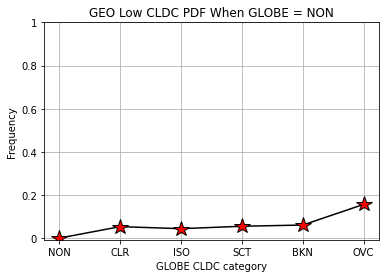

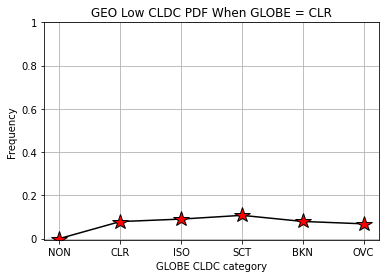

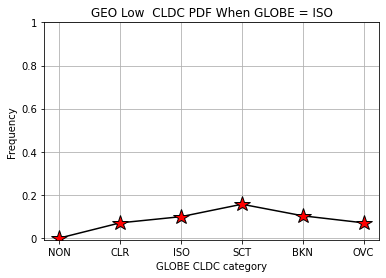

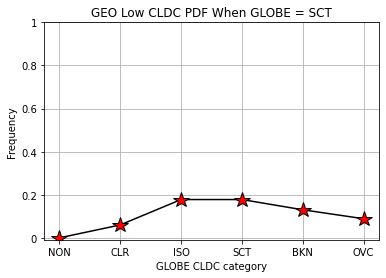

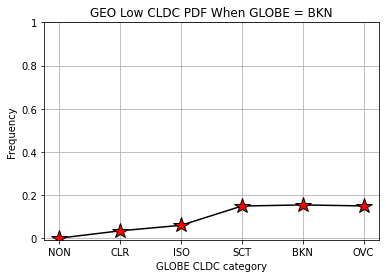

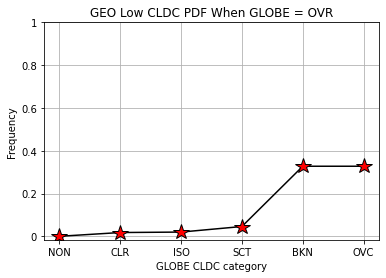

In [ ]:
# Calculating points for LOW level, NON category graph
Low_NONNON_graph = (calcUserEntries('NON', 'none', 'Low'))/Low_GEONON_Entries
Low_NONCLR_graph = (calcUserEntries('NON', 'few', 'Low'))/Low_GEONON_Entries
Low_NONISO_graph = (calcUserEntries('NON', 'isolated', 'Low'))/Low_GEONON_Entries
Low_NONSCT_graph = (calcUserEntries('NON', 'scattered', 'Low'))/Low_GEONON_Entries
Low_NONBKN_graph = (calcUserEntries('NON', 'broken', 'Low'))/Low_GEONON_Entries
Low_NONOVR_graph = (calcUserEntries('NON', 'overcast', 'Low'))/Low_GEONON_Entries
Low_graph1 = [Low_NONNON_graph, Low_NONCLR_graph, Low_NONISO_graph, Low_NONSCT_graph, Low_NONBKN_graph, Low_NONOVR_graph]
drawGraph('NON', Low_graph1, 'Low')
plt.show()

# Calculating points for LOW level, CLR category graph
Low_CLRNON_graph = (calcUserEntries('CLR', 'none', 'Low'))/Low_GEOCLR_Entries
Low_CLRCLR_graph = (calcUserEntries('CLR', 'few', 'Low'))/Low_GEOCLR_Entries
Low_CLRISO_graph = (calcUserEntries('CLR', 'isolated', 'Low'))/Low_GEOCLR_Entries
Low_CLRSCT_graph = (calcUserEntries('CLR', 'scattered', 'Low'))/Low_GEOCLR_Entries
Low_CLRBKN_graph = (calcUserEntries('CLR', 'broken', 'Low'))/Low_GEOCLR_Entries
Low_CLROVR_graph = (calcUserEntries('CLR', 'overcast', 'Low'))/Low_GEOCLR_Entries
Low_graph2 = [Low_CLRNON_graph, Low_CLRCLR_graph, Low_CLRISO_graph, Low_CLRSCT_graph, Low_CLRBKN_graph, Low_CLROVR_graph]
drawGraph('CLR', Low_graph2, 'Low')
plt.show()

# Calculating points for LOW level, ISO category graph
Low_ISONON_graph = (calcUserEntries('ISO', 'none', 'Low'))/Low_GEOISO_Entries
Low_ISOCLR_graph = (calcUserEntries('ISO', 'few', 'Low'))/Low_GEOISO_Entries
Low_ISOISO_graph = (calcUserEntries('ISO', 'isolated', 'Low'))/Low_GEOISO_Entries
Low_ISOSCT_graph = (calcUserEntries('ISO', 'scattered', 'Low'))/Low_GEOISO_Entries
Low_ISOBKN_graph = (calcUserEntries('ISO', 'broken', 'Low'))/Low_GEOISO_Entries
Low_ISOOVR_graph = (calcUserEntries('ISO', 'overcast', 'Low'))/Low_GEOISO_Entries
Low_graph3 = [Low_ISONON_graph, Low_ISOCLR_graph, Low_ISOISO_graph, Low_ISOSCT_graph, Low_ISOBKN_graph, Low_ISOOVR_graph]
drawGraph('ISO', Low_graph3, 'Low')
plt.show()

# Calculating points for LOW level, SCT category graph
Low_SCTNON_graph = (calcUserEntries('SCT', 'none', 'Low'))/Low_GEOSCT_Entries
Low_SCTCLR_graph = (calcUserEntries('SCT', 'few', 'Low'))/Low_GEOSCT_Entries
Low_SCTSCT_graph = (calcUserEntries('SCT', 'isolated', 'Low'))/Low_GEOSCT_Entries
Low_SCTSCT_graph = (calcUserEntries('SCT', 'scattered', 'Low'))/Low_GEOSCT_Entries
Low_SCTBKN_graph = (calcUserEntries('SCT', 'broken', 'Low'))/Low_GEOSCT_Entries
Low_SCTOVR_graph = (calcUserEntries('SCT', 'overcast', 'Low'))/Low_GEOSCT_Entries
Low_graph4 = [Low_SCTNON_graph, Low_SCTCLR_graph, Low_SCTSCT_graph, Low_SCTSCT_graph, Low_SCTBKN_graph, Low_SCTOVR_graph]
drawGraph('SCT', Low_graph4, 'Low')
plt.show()

# Calculating points for LOW level, BKN category graph
Low_BKNNON_graph = (calcUserEntries('BKN', 'none', 'Low'))/Low_GEOBKN_Entries
Low_BKNCLR_graph = (calcUserEntries('BKN', 'few', 'Low'))/Low_GEOBKN_Entries
Low_BKNISO_graph = (calcUserEntries('BKN', 'isolated', 'Low'))/Low_GEOBKN_Entries
Low_BKNSCT_graph = (calcUserEntries('BKN', 'scattered', 'Low'))/Low_GEOBKN_Entries
Low_BKNBKN_graph = (calcUserEntries('BKN', 'broken', 'Low'))/Low_GEOBKN_Entries
Low_BKNOVR_graph = (calcUserEntries('BKN', 'overcast', 'Low'))/Low_GEOBKN_Entries
Low_graph5 = [Low_BKNNON_graph, Low_BKNCLR_graph, Low_BKNISO_graph, Low_BKNSCT_graph, Low_BKNBKN_graph, Low_BKNOVR_graph]
drawGraph('BKN', Low_graph5, 'Low')
plt.show()

# Calculating points for LOW level, OVR category graph
Low_OVRNON_graph = (calcUserEntries('OVR', 'none', 'Low'))/Low_GEOOVR_Entries
Low_OVRCLR_graph = (calcUserEntries('OVR', 'few', 'Low'))/Low_GEOOVR_Entries
Low_OVRISO_graph = (calcUserEntries('OVR', 'isolated', 'Low'))/Low_GEOOVR_Entries
Low_OVRSCT_graph = (calcUserEntries('OVR', 'scattered', 'Low'))/Low_GEOOVR_Entries
Low_OVRBKN_graph = (calcUserEntries('OVR', 'broken', 'Low'))/Low_GEOOVR_Entries
Low_OVROVR_graph = (calcUserEntries('OVR', 'overcast', 'Low'))/Low_GEOOVR_Entries
Low_graph6 = [Low_OVRNON_graph, Low_OVRCLR_graph, Low_OVRISO_graph, Low_OVRSCT_graph, Low_OVROVR_graph, Low_OVROVR_graph]
drawGraph('OVR', Low_graph6, 'Low')
plt.show()

###Are there any altitudes and cloud conditions at which you notice significant discrepancies between satellite and citizen scientist observations?

The data for high clouds appear similarly to the graph in Objective 1.
However, while the lower Satellite Cover categories (such as NON and CLR) doesn't really change as we approach lower cloud levels,
the higher Satellite Cover categories (BKN and OVC) decreases in terms of Satellite Cover, becoming more level with the rest of the categories.

For the line graphs, something in common between all of them is they come from the same cloud data base as all of the other graphs. However the line graphs are sub data sets of Objective 2 total that is divided up into high, mid, and low. Also another reason why these data sets look different is because the citizen scientis observer can't see what's high, mid, and low. Citizen scientist are observering within the atomsphere where there might be clouds in the sky that blocks another section of clouds from the ground view.

Something in common between all of them is that NON's value is near (or at) 0. However outside of that, the values of each of them vary quite a bit. It should be noted that each one of them, aside from BKN and OVC categories of OVR Low (the last graph), is that none of the categories goes above 0.2 frequency. This makes sense, as each one of these graphs does add up to the graphs of objective 2.


# Conclusion

Gathering cloud data has come a long way since 1957, where it was heavy dependent on satellite data and the clear images that are being provided from out of space. However, human observation has nowadays started to become something that the researcher uses as cloud data as well. Observing the clouds from inside the earth's atmosphere can provide a new approach to cloud observation. The two different sources of observation start to raise a question: "How much different is satellite data in comparison to human observations?" 

As such, we used data from citizens on the ground, and compare it to satellite data. We found that there was some difference, and we concluded that it is due to the clouds covering one another making the human observation different from the satellite data.  We were able to come to this conclusion because of the different objective tasks we have complete.

* Objective 1 helped us understand the difference 
between the citizen scientist observation compare to satellite observation, since we were able to recreate a boxplot that plotted the exact time the observation happened for the citizen's scientist and satellites.
* Objective 2 helped us understand the total cloud coverage from both observers by creating a line graph to see the visual comparison.
* Finally, objective 3 really helped us see the subcategory with the total cloud coverage that was divided up into high, mid, and low.

A new direction to this could be on the comparison bewteen the different software citizens scientist use to collect cloud data compare to satellite data.


## Bibliography
Dodson, J. B., Robles, M. C., Taylor, J. E., DeFontes, C. C., & Weaver K. L. (2019). Eclipse across America: Citizen Science Observations of the 21 August 2017 Total Solar Eclipse. Journal of Applied Meteorology and Climatology, 58(11), 2363-2385.







